## Importing all required packages

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Loading data from file "application_data.csv"

In [3]:
df=pd.read_csv('C:/Users/kvine/Downloads/PGD/EAD_Case-study/application_data.csv')

In [4]:

pd.set_option('display.max_columns',122) 
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

## Checking structure of dataframe 

In [80]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   SK_ID_CURR                    int64  
 1   TARGET                        int64  
 2   NAME_CONTRACT_TYPE            object 
 3   CODE_GENDER                   object 
 4   FLAG_OWN_CAR                  object 
 5   FLAG_OWN_REALTY               object 
 6   CNT_CHILDREN                  int64  
 7   AMT_INCOME_TOTAL              float64
 8   AMT_CREDIT                    float64
 9   AMT_ANNUITY                   float64
 10  AMT_GOODS_PRICE               float64
 11  NAME_TYPE_SUITE               object 
 12  NAME_INCOME_TYPE              object 
 13  NAME_EDUCATION_TYPE           object 
 14  NAME_FAMILY_STATUS            object 
 15  NAME_HOUSING_TYPE             object 
 16  REGION_POPULATION_RELATIVE    float64
 17  DAYS_BIRTH                    int64  
 18  DAYS_EMPLOYED          

In [5]:
df.shape

(307511, 122)

## Handling missing values and data quality checks



#### Missing values

In [83]:
# Finding % of missing values
100*(df.isnull().sum()/len(df))[(df.isnull().sum()/len(df))*100>0]

AMT_ANNUITY                    0.003902
AMT_GOODS_PRICE                0.090403
NAME_TYPE_SUITE                0.420148
OWN_CAR_AGE                   65.990810
OCCUPATION_TYPE               31.345545
                                ...    
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
Length: 67, dtype: float64

In [5]:
# No of columns with more than or equal to 50% missing values
res=df.columns[round((df.isnull().sum()/len(df))*100,2)>=50].tolist()
res

['OWN_CAR_AGE',
 'EXT_SOURCE_1',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'YEARS_BUILD_MODE',
 'COMMONAREA_MODE',
 'ELEVATORS_MODE',
 'ENTRANCES_MODE',
 'FLOORSMIN_MODE',
 'LANDAREA_MODE',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAREA_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAREA_MODE',
 'APARTMENTS_MEDI',
 'BASEMENTAREA_MEDI',
 'YEARS_BUILD_MEDI',
 'COMMONAREA_MEDI',
 'ELEVATORS_MEDI',
 'ENTRANCES_MEDI',
 'FLOORSMIN_MEDI',
 'LANDAREA_MEDI',
 'LIVINGAPARTMENTS_MEDI',
 'LIVINGAREA_MEDI',
 'NONLIVINGAPARTMENTS_MEDI',
 'NONLIVINGAREA_MEDI',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MODE',
 'WALLSMATERIAL_MODE']

In [6]:
#1. drop column with more than 50% null values
df.drop(columns=res,
    inplace=True)
df.shape

(307511, 81)

In [7]:
#2.Imputing missing value of categorical column with mode value
df.NAME_TYPE_SUITE.fillna(df.NAME_TYPE_SUITE.mode()[0],inplace=True)
df.NAME_TYPE_SUITE.isnull().sum()

0

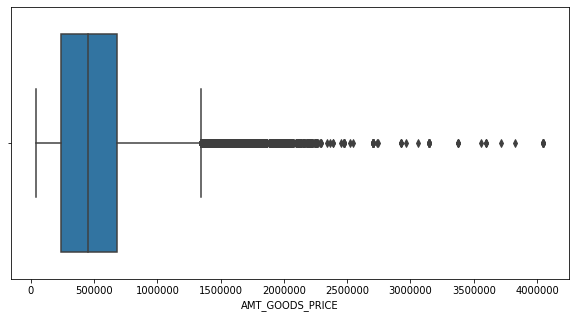

In [8]:
# checking if AMT_GOODS_PRICE have outlier, inorder to replace the missing value with mean or median
plt.figure(figsize=[10,5])
sns.boxplot(df.AMT_GOODS_PRICE)

In [9]:
#3. As column AMT_GOODS_PRICE has outlier, replacing the null with median value
df.AMT_GOODS_PRICE.fillna(df.AMT_GOODS_PRICE.median(),inplace=True)
df.AMT_GOODS_PRICE.isnull().sum()

0

In [10]:
#4. Replacing count of family members having null with 0
df.CNT_FAM_MEMBERS.fillna(0,inplace=True)
df.CNT_FAM_MEMBERS.isnull().sum()

0

In [11]:
# 5.Removing unwanted columns in series beyond 30th column
df1=df.iloc[:,0:29]

In [12]:
#6. Drop individual columns between 0 to 30 columns
df1.drop(columns=['NAME_HOUSING_TYPE','CNT_CHILDREN','REGION_POPULATION_RELATIVE','FLAG_EMP_PHONE','FLAG_WORK_PHONE','FLAG_PHONE'],
    inplace=True)
df1.shape

(307511, 23)

#### Modifing datatypes and columns

In [13]:
#Changing datatypes of columns CNT_FAM_MEMBERS,DAYS_REGISTRATION from float to int
df1.astype({'CNT_FAM_MEMBERS': 'int32','DAYS_REGISTRATION': 'int32'}).dtypes

SK_ID_CURR               int64
TARGET                   int64
NAME_CONTRACT_TYPE      object
CODE_GENDER             object
FLAG_OWN_CAR            object
FLAG_OWN_REALTY         object
AMT_INCOME_TOTAL       float64
AMT_CREDIT             float64
AMT_ANNUITY            float64
AMT_GOODS_PRICE        float64
NAME_TYPE_SUITE         object
NAME_INCOME_TYPE        object
NAME_EDUCATION_TYPE     object
NAME_FAMILY_STATUS      object
DAYS_BIRTH               int64
DAYS_EMPLOYED            int64
DAYS_REGISTRATION        int32
DAYS_ID_PUBLISH          int64
FLAG_MOBIL               int64
FLAG_CONT_MOBILE         int64
FLAG_EMAIL               int64
OCCUPATION_TYPE         object
CNT_FAM_MEMBERS          int32
dtype: object

In [14]:
# converting columns given in number of negative days into years like Days_birth
def yrs(x):
    return abs(x*(1/365))

df1['DAYS_BIRTH']=df1['DAYS_BIRTH'].apply(yrs).astype(int)

# converting days employed year with decimal pricesion 1
df1['DAYS_EMPLOYED']=df1['DAYS_EMPLOYED'].apply(yrs).round(1)

# Renaming modified columns
df1.rename(columns={"DAYS_BIRTH": "AGE", "DAYS_EMPLOYED": "YEARS_EMPLOYED"},inplace=True)

# converting negative days of columns 'DAYS_REGISTRATION','DAYS_ID_PUBLISH' into just days
l1=['DAYS_REGISTRATION','DAYS_ID_PUBLISH']
for i in range(0,len(l1)):
    df1[l1[i]]=abs(df1[l1[i]]).astype(int)


# Checking modifications
df1[['AGE','YEARS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH']].head()

,AGE,YEARS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH
0,25,1.7,3648,2120
1,45,3.3,1186,291
2,52,0.6,4260,2531
3,52,8.3,9833,2437
4,54,8.3,4311,3458


#### Outliers

In [15]:
#1.Identifing outliers on column AMT_GOODS_PRICE using quantile functionality
df1.AMT_GOODS_PRICE.quantile([0,0.25,0.5,0.75,0.99,1])

0.00      40500.0
0.25     238500.0
0.50     450000.0
0.75     679500.0
0.99    1800000.0
1.00    4050000.0
Name: AMT_GOODS_PRICE, dtype: float64

#### There is much variance in data after 75% before that amount is continuous.Reason for this maybe  a few applicants took loan for high priced  good.

In [16]:
#2.Identifing outliers on column AGE using describe
df1.AGE.describe()

count    307511.000000
mean         43.435968
std          11.954593
min          20.000000
25%          34.000000
50%          43.000000
75%          53.000000
max          69.000000
Name: AGE, dtype: float64

#### There are no outliers in AGE column because there are no variance from minimun to max value, even Q3(75%)-Q1(25%) is 19 which is continuous. Loans are applied by all age groups.

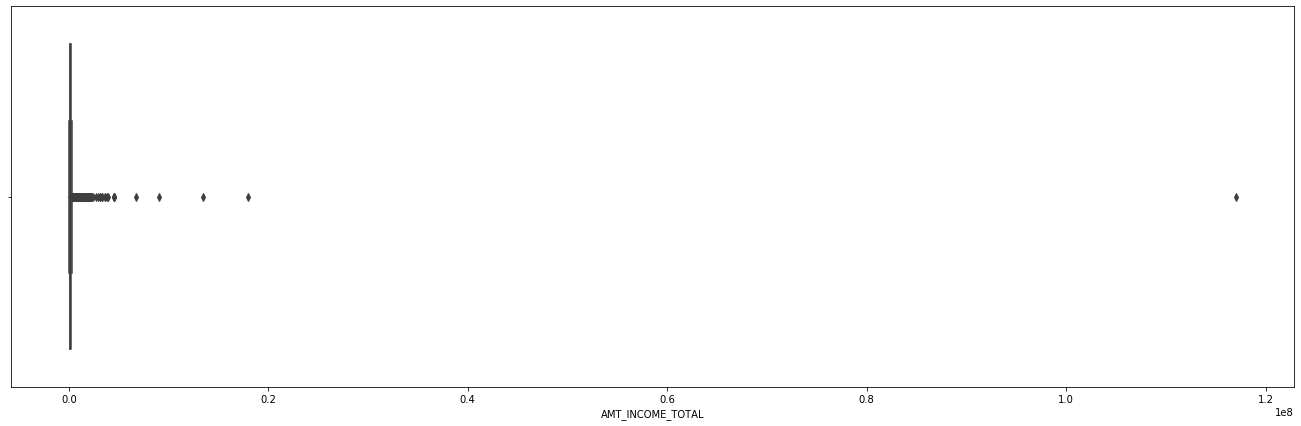

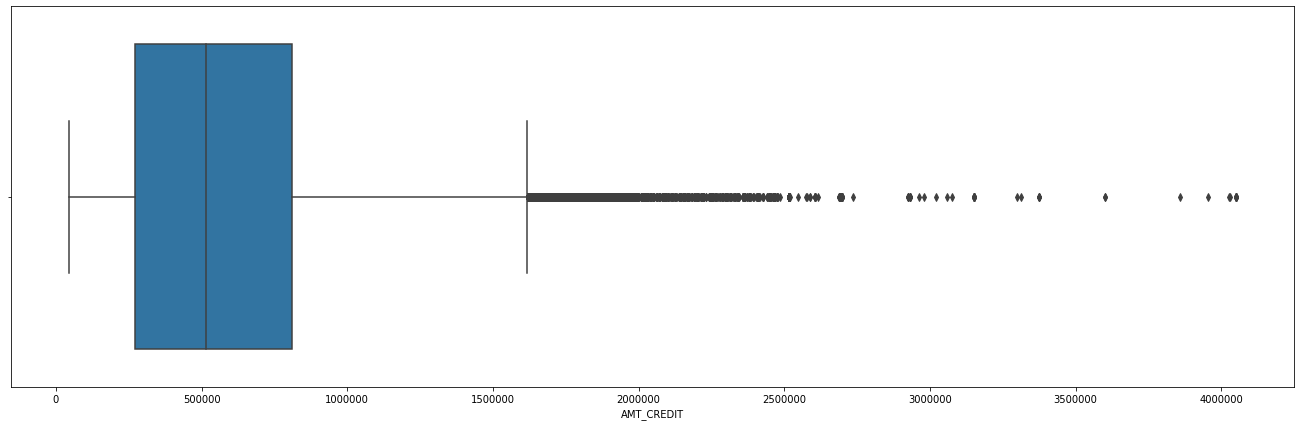

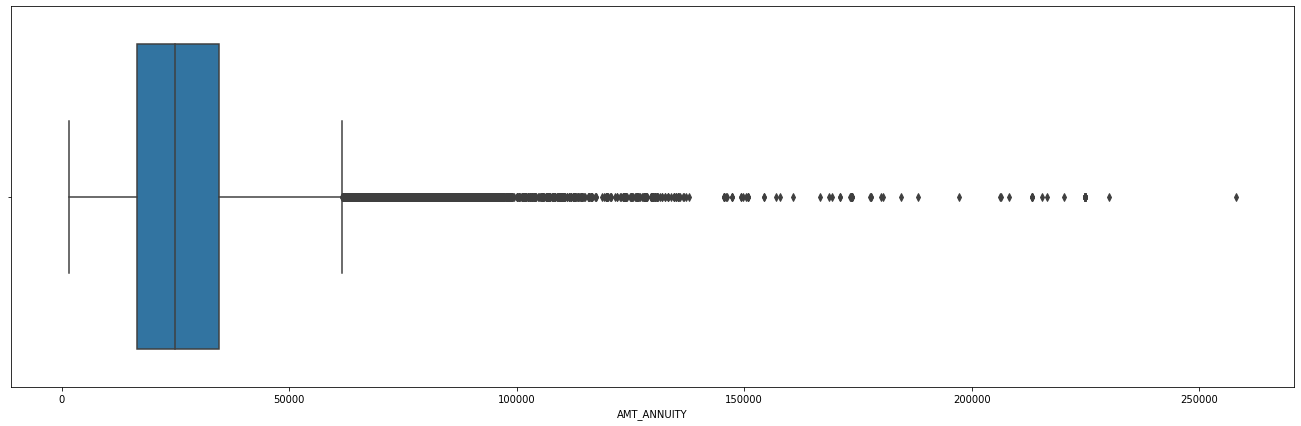

In [17]:
# 3.Identifing outliers on columns AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY using boxplot
l=['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY']
for i in range(0,len(l)): 
    plt.figure(figsize=[23,7])
    sns.boxplot(df1[l[i]])
#     b.set_xlabel(df1[l[i]])

### All three columns AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY have outliers.
#### 1st box plot has outlier with very high values,so IQR is not visible. Ex: They might be a few people with very high income
#### Credit amout requested by applicants is mostly below 1 million but they are some anomalies above that amount.
#### Loan annuity is 50,000 for approximately 75% of data,however there are varience beyond that range.

### Binning

In [153]:
#3.Binning columns AMT_INCOME_TOTAL,AGE.
df1['INCOME_RANGE']=pd.cut(df1.AMT_INCOME_TOTAL,
    bins=df1.AMT_INCOME_TOTAL.quantile([0,0.25,0.5,0.75,1]),
    labels=['low','medium','high','very high']
)
df1['AGE_RANGE']=pd.cut(df1.AGE,
    bins=df1.AGE.quantile([0,0.25,0.5,0.75,1]),
    labels=['20-34','35-43','44-53','54-69']
)

In [154]:
df1[['AGE_RANGE','INCOME_RANGE']].head()

,AGE_RANGE,INCOME_RANGE
0,20-34,high
1,44-53,very high
2,44-53,low
3,44-53,medium
4,54-69,medium


## Analysis

In [19]:
#Imbalance percentage
100*df1.TARGET.value_counts(normalize = True)

0    91.927118
1     8.072882
Name: TARGET, dtype: float64

In [23]:
# Dividing dataset based on target column
t0=df1[(df1.TARGET==0)]
t1=df1[(df1.TARGET==1)]

#### Correlation metrics

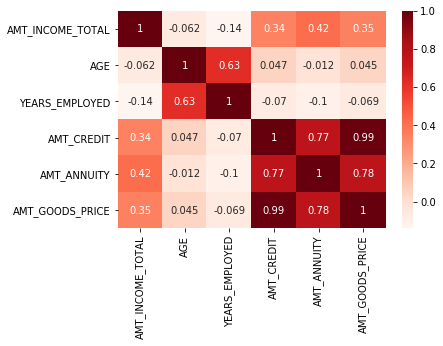

In [22]:
#correlation between columns 'AMT_INCOME_TOTAL','AGE','YEARS_EMPLOYED','AMT_CREDIT','AMT_ANNUITY' & 'AMT_GOODS_PRICE' 
# with target 0 using heat map
sns.heatmap(t0[['AMT_INCOME_TOTAL','AGE','YEARS_EMPLOYED','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE']].corr(), annot = True,cmap='Reds')

In [395]:
#correlation between columns 'AMT_INCOME_TOTAL','AGE','YEARS_EMPLOYED','AMT_CREDIT','AMT_ANNUITY' & 'AMT_GOODS_PRICE'
# with target 1 using correlaton metrics
t1[['AMT_INCOME_TOTAL','AGE','YEARS_EMPLOYED','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE']].corr()

,AMT_INCOME_TOTAL,AGE,YEARS_EMPLOYED,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE
AMT_INCOME_TOTAL,1.000000,-0.003154,-0.014978,0.038131,0.046421,0.037591
AGE,-0.003154,1.000000,0.582441,0.135070,0.014028,0.135532
YEARS_EMPLOYED,-0.014978,0.582441,1.000000,0.001930,-0.081207,0.006648
AMT_CREDIT,0.038131,0.135070,0.001930,1.000000,0.752195,0.982783
AMT_ANNUITY,0.046421,0.014028,-0.081207,0.752195,1.000000,0.752295
AMT_GOODS_PRICE,0.037591,0.135532,0.006648,0.982783,0.752295,1.000000


##### Both the case target 0 &1 highest correlation is found in columns AMT_CREDIT,AMT_ANNUITY & AMT_GOODS_PRICE becaues loan amount is directly related to loan annuity and goods price.

In [389]:
# Correlation between top 3 correlated columns for target 0
corr = t0[['AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE']].corr()
corr_df = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))
corr_df = corr_df.unstack().reset_index().dropna(subset = [0])
corr_df.columns = ['VAR1', 'VAR2', 'Correlation_Value']
corr_df

,VAR1,VAR2,Correlation_Value
3,AMT_ANNUITY,AMT_CREDIT,0.771309
6,AMT_GOODS_PRICE,AMT_CREDIT,0.987022
7,AMT_GOODS_PRICE,AMT_ANNUITY,0.776433


In [396]:
# Correlation between top 3 correlated columns for target 1
corr = t1[['AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE']].corr()
corr_df1 = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))
corr_df1 = corr_df1.unstack().reset_index().dropna(subset = [0])
corr_df1.columns = ['VAR1', 'VAR2', 'Correlation_Value']
corr_df1

,VAR1,VAR2,Correlation_Value
3,AMT_ANNUITY,AMT_CREDIT,0.752195
6,AMT_GOODS_PRICE,AMT_CREDIT,0.982783
7,AMT_GOODS_PRICE,AMT_ANNUITY,0.752295


### Univariate & Bivariate Analysis¶
Univariate:

Numerical Variable
<br>
Categorical Variable


Bivariate Anlysis:

Numeric-Numeric<br>
Categorical-Categorical<br>
Numeric-Categorical

### Univariate Analysis

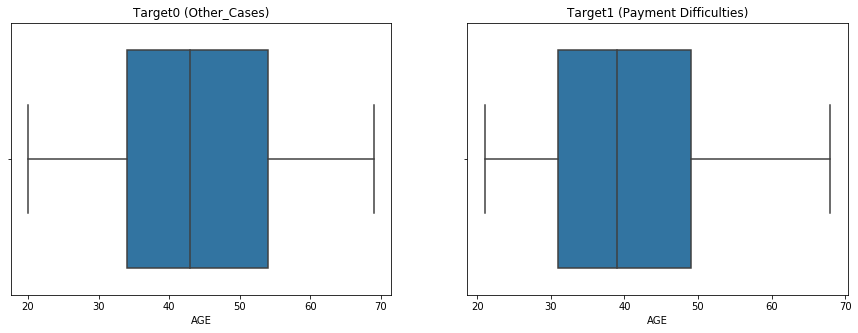

In [649]:
#Ordered categorical analysis using column AGE
plt.figure(figsize=[15,5])
plt.subplot(1,2,1)
plt.title("Target0 (Other_Cases)")
sns.boxplot(t0.AGE)
plt.subplot(1,2,2)
plt.title("Target1 (Payment Difficulties)")
sns.boxplot(t1.AGE)


#### Ages below 40 have more payment difficulties compared to others(Median of second plot is skewed towards left)

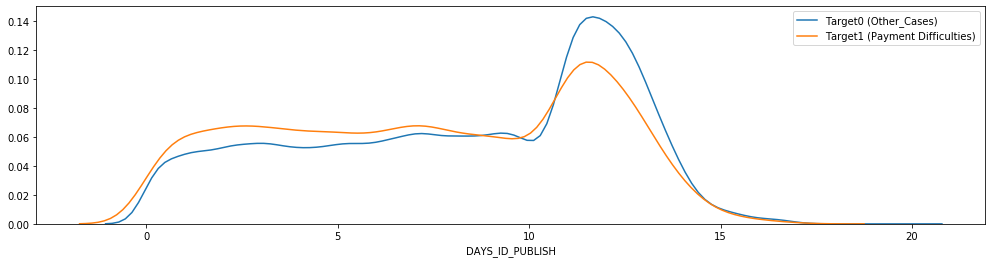

In [656]:
#Numerical analysis on column days of ID published
plt.figure(figsize=[17,4])

# plt.subplot(1,2,1)
# plt.title("Target0 (Other_Cases)")
sns.distplot(t0.DAYS_ID_PUBLISH/365,hist=False,label = 'Target0 (Other_Cases)')

# plt.title("Target1 (Payment Difficulties)")
sns.distplot(t1.DAYS_ID_PUBLISH/365,hist=False,label = 'Target1 (Payment Difficulties)')

#### Applicants holding recent pulished id has mush payment difficultly compared to older id's.

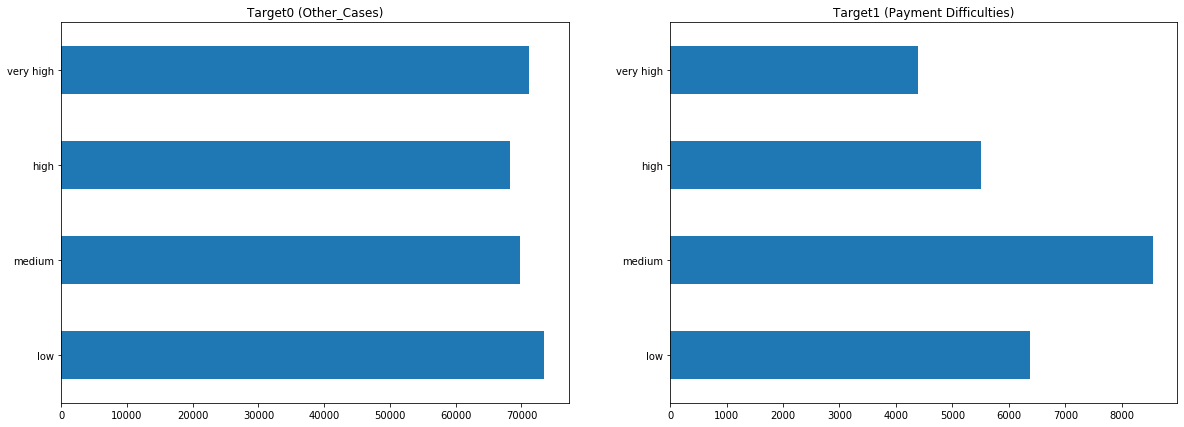

In [155]:
# Univariate categorical analysis
plt.figure(figsize=[20,7])
plt.subplot(1,2,1)
plt.title("Target0 (Other_Cases)")
t0.INCOME_RANGE.value_counts().sort_index().plot.barh()
plt.subplot(1,2,2)
plt.title("Target1 (Payment Difficulties)")
t1.INCOME_RANGE.value_counts().sort_index().plot.barh()
plt.show()

#### Applicants with medium salary have more repaying difficulties and very high salary have less payment difficulties

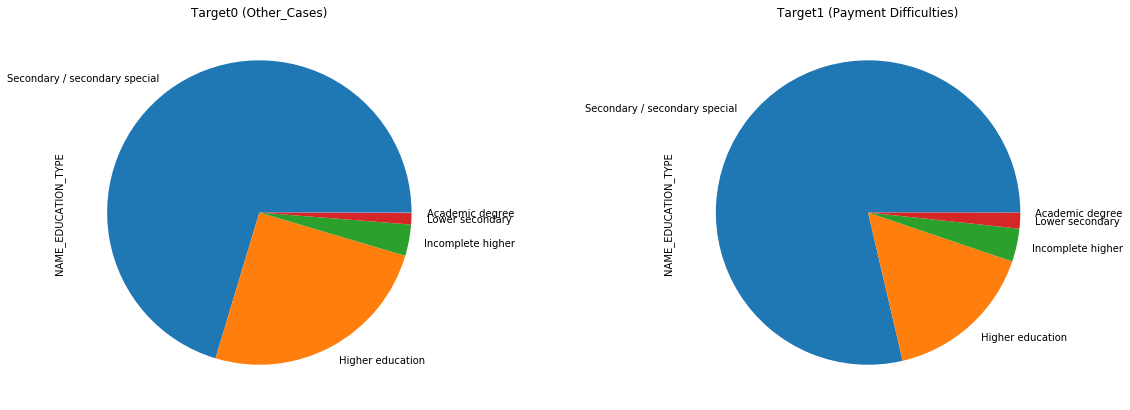

In [591]:
# Univariate categorical analysis
plt.figure(figsize=[20,7])
plt.subplot(1,2,1)
plt.title("Target0 (Other_Cases)")
t0.NAME_EDUCATION_TYPE.value_counts(normalize=True).plot.pie()
plt.subplot(1,2,2)
plt.title("Target1 (Payment Difficulties)")
t1.NAME_EDUCATION_TYPE.value_counts(normalize=True).plot.pie()

Applicats with higer education are high in Target0 and people with lower secondary is slightly more in Target1.

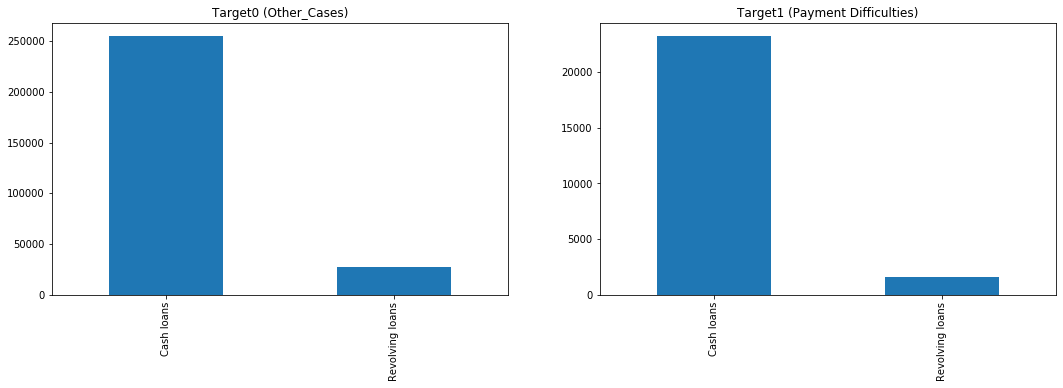

In [657]:
# Univariate categorical analysis
plt.figure(figsize=[18,5])
plt.subplot(1,2,1)
plt.title("Target0 (Other_Cases)")

t0.NAME_CONTRACT_TYPE.value_counts().plot.bar()
plt.xticks(rotation = 90)

plt.subplot(1,2,2)
plt.title("Target1 (Payment Difficulties)")
t1.NAME_CONTRACT_TYPE.value_counts().plot.bar()


#### Applicants requested for revolving loans has less payment difficulties

### Bivariate analysis

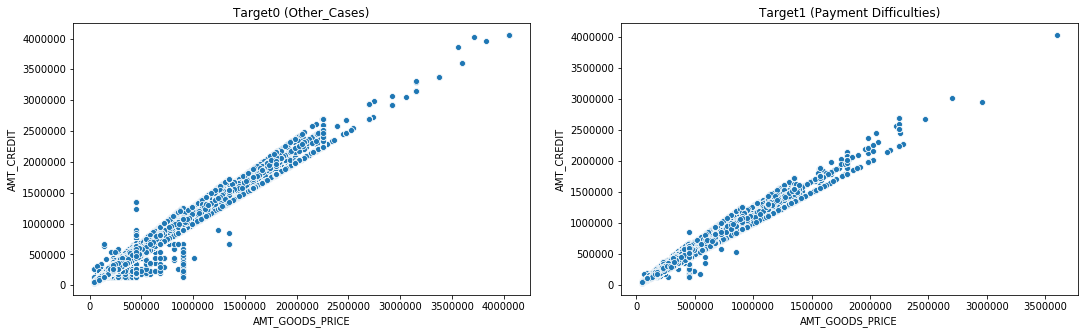

In [672]:
# Numeric-Numeric
plt.figure(figsize=[18,5])
plt.subplot(1,2,1)
plt.title("Target0 (Other_Cases)")

sns.scatterplot(t0.AMT_GOODS_PRICE,t0.AMT_CREDIT)

plt.subplot(1,2,2)
plt.title("Target1 (Payment Difficulties)")
sns.scatterplot(t1.AMT_GOODS_PRICE,t1.AMT_CREDIT)

#### There is clear co-relation between AMT_GOODS_PRICE & AMT_CREDIT is both the cases, applicants got loan as per goods price.


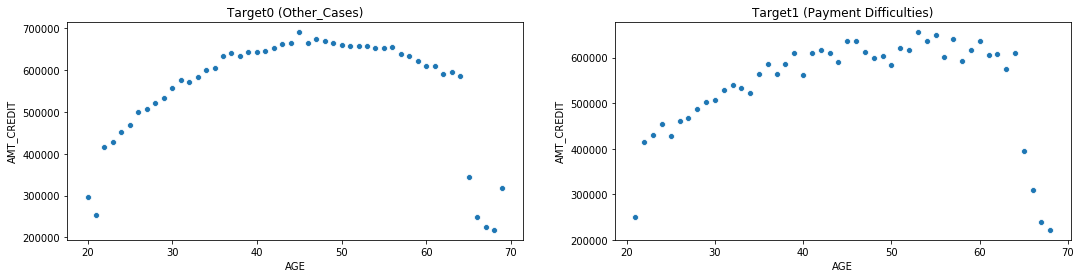

In [705]:
# Numeric-Numeric
d1=t0.groupby('AGE')['AMT_CREDIT'].mean().reset_index()
d2=t1.groupby('AGE')['AMT_CREDIT'].mean().reset_index()

plt.figure(figsize=[18,4])
plt.subplot(1,2,1)
plt.title("Target0 (Other_Cases)")


sns.scatterplot(d1.AGE,d1.AMT_CREDIT)
plt.subplot(1,2,2)
plt.title("Target1 (Payment Difficulties)")
sns.scatterplot(d2.AGE,d2.AMT_CREDIT)


#### Ages over 20 loan credit limit is linerly increasing upto 60 and then it decreased in Target0 and in Taget1 there is variance in amount.

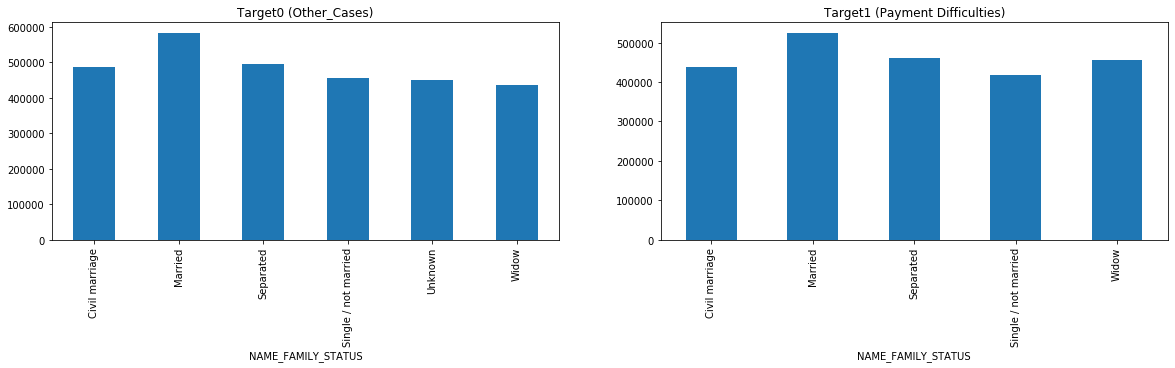

In [764]:
# Numerical-Categorical
plt.figure(figsize = (20, 4))
plt.subplot(1,2,1)
plt.title("Target0 (Other_Cases)")
t0.groupby(['NAME_FAMILY_STATUS'])['AMT_GOODS_PRICE'].mean().plot.bar()

plt.subplot(1,2,2)
plt.title("Target1 (Payment Difficulties)")
t1.groupby(['NAME_FAMILY_STATUS'])['AMT_GOODS_PRICE'].mean().plot.bar()


#### Married people has applied for loan with high value.

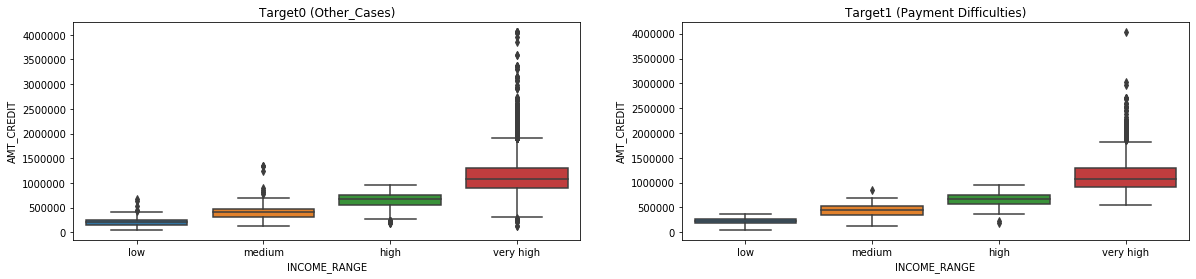

In [156]:
# Numerical-Categorical
plt.figure(figsize = (20, 4))
plt.subplot(1,2,1)
plt.title("Target0 (Other_Cases)")
sns.boxplot(t0.INCOME_RANGE,t0.AMT_CREDIT)

plt.subplot(1,2,2)
plt.title("Target1 (Payment Difficulties)")
sns.boxplot(t1.INCOME_RANGE,t1.AMT_CREDIT)

#### Average loan credit is based on applicants income

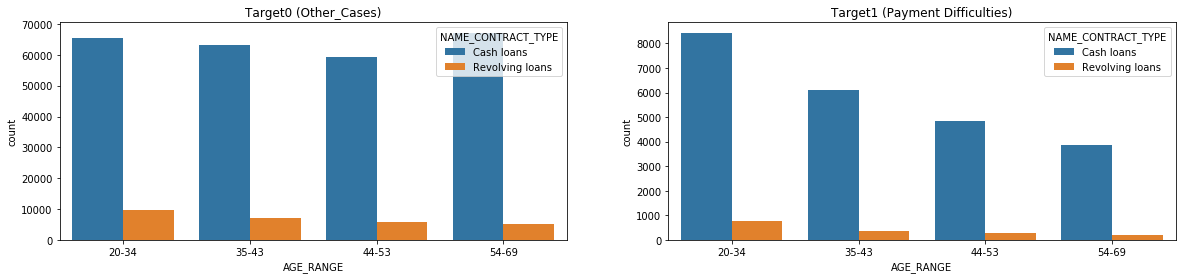

In [761]:
# Categorical-Categorical

plt.figure(figsize = (20, 4))
plt.subplot(1,2,1)
plt.title("Target0 (Other_Cases)")
sns.countplot(x = 'AGE_RANGE', hue = 'NAME_CONTRACT_TYPE', data = t0)


plt.subplot(1,2,2)
plt.title("Target1 (Payment Difficulties)")
sns.countplot(x = 'AGE_RANGE', hue = 'NAME_CONTRACT_TYPE', data = t1)


#### Payment difficulties in revolving loans is less than the cash loans

## Loading data from file "previous_application.csv"

In [24]:
#Loading the data

df2=pd.read_csv('C:/Users/kvine/Downloads/PGD/EAD_Case-study/previous_application.csv')

In [26]:
df2.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
#Removing unwanted data
df2=df2.iloc[:,:20]
df2.drop(columns=['WEEKDAY_APPR_PROCESS_START','HOUR_APPR_PROCESS_START'
                  ,'FLAG_LAST_APPL_PER_CONTRACT','NFLAG_LAST_APPL_IN_DAY','RATE_DOWN_PAYMENT','DAYS_DECISION'],inplace=True)

In [28]:
#identifing missing columns with >50%
res=df2.columns[round((df2.isnull().sum()/len(df2))*100,2)>=50].tolist()
res

['AMT_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY', 'RATE_INTEREST_PRIVILEGED']

In [29]:
# droping columns with >50% null
df2.drop(columns=res,inplace=True)

In [30]:
df2.shape

(1670214, 11)

## Merging the two datasets application and previous application

In [31]:
#Merging the 2 datasets
df3=df1.merge(df2, on='SK_ID_CURR')

In [32]:
df3.shape

(1413701, 35)

In [51]:
df3.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,AGE,YEARS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_CONT_MOBILE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,INCOME_RANGE,AGE_RANGE,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_GOODS_PRICE_y,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,NAME_PAYMENT_TYPE,CODE_REJECT_REASON
0,100002,1,Cash loans,M,N,Y,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,25,1.7,3648,2120,1,1,0,Laborers,1.0,medium,20-34,1038818,Consumer loans,9251.775,179055.0,179055.0,179055.0,XAP,Approved,XNA,XAP
1,100003,0,Cash loans,F,N,N,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,45,3.3,1186,291,1,1,0,Core staff,2.0,very high,44-53,1810518,Cash loans,98356.995,900000.0,1035882.0,900000.0,XNA,Approved,XNA,XAP
2,100003,0,Cash loans,F,N,N,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,45,3.3,1186,291,1,1,0,Core staff,2.0,very high,44-53,2636178,Consumer loans,64567.665,337500.0,348637.5,337500.0,XAP,Approved,Cash through the bank,XAP
3,100003,0,Cash loans,F,N,N,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,45,3.3,1186,291,1,1,0,Core staff,2.0,very high,44-53,2396755,Consumer loans,6737.310,68809.5,68053.5,68809.5,XAP,Approved,Cash through the bank,XAP
4,100004,0,Revolving loans,M,Y,Y,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,52,0.6,4260,2531,1,1,0,Laborers,1.0,low,44-53,1564014,Consumer loans,5357.250,24282.0,20106.0,24282.0,XAP,Approved,Cash through the bank,XAP


### Univariate Analysis

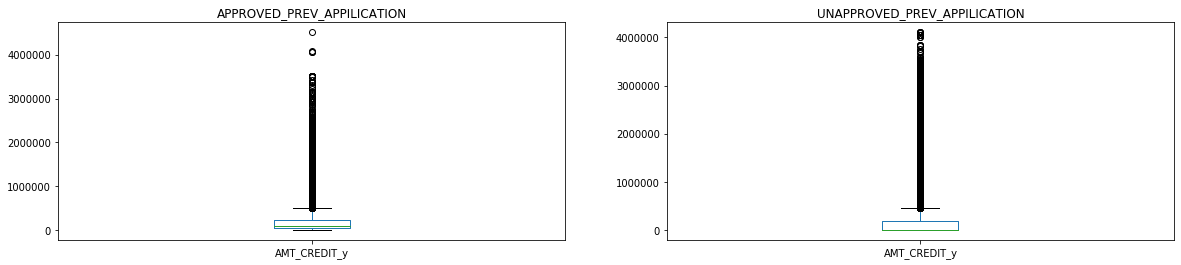

In [56]:
# Numeric Analysis
d1=df3[df3.NAME_CONTRACT_STATUS!="Approved"]
d2=df3[df3.NAME_CONTRACT_STATUS=="Approved"]
plt.figure(figsize = (20, 4))
plt.subplot(1,2,1)
plt.title("APPROVED_PREV_APPILICATION")
d2.AMT_CREDIT_y.plot.box()

plt.subplot(1,2,2)
plt.title("UNAPPROVED_PREV_APPILICATION")
d1.AMT_CREDIT_y.plot.box()

# sns.boxplot(df3.NAME_CONTRACT_STATUS)

#### Loan credit of previous application with unapproved has more extreme values than approved application. 
#### Thus, application for higer amount loan is mostly not approved

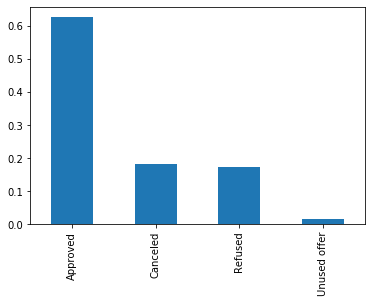

In [66]:
# Univariate categorical analysis
df3.NAME_CONTRACT_STATUS.value_counts(normalize=True).plot.bar()

#### Approval rate is high compared to other category

### Bivariate Analysis

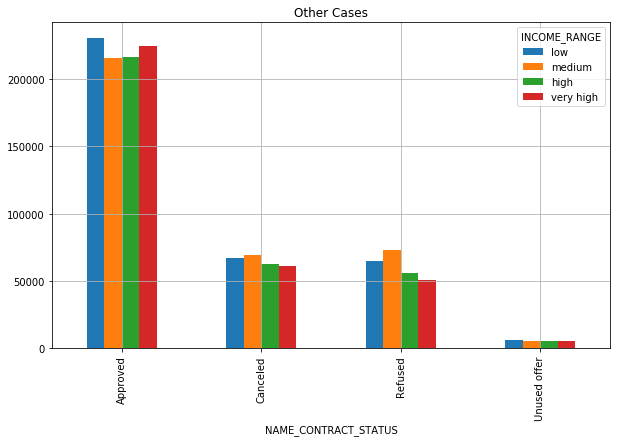

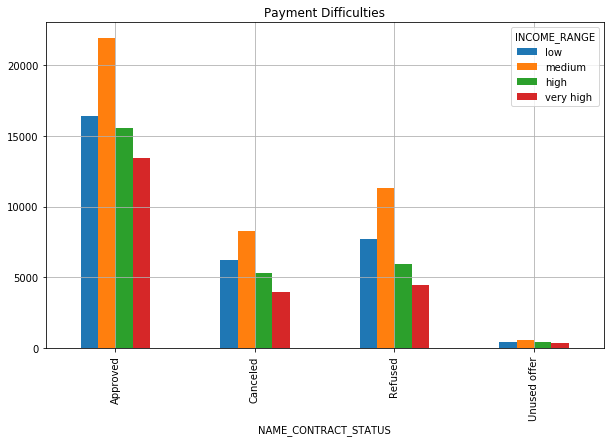

In [157]:
# Numerical-Catagorical

d5=pd.pivot_table(data=df3,
    index=['NAME_CONTRACT_STATUS'],
    columns=['INCOME_RANGE'] ,          
    values='SK_ID_PREV',
    
    aggfunc='count'
)
d6=pd.pivot_table(data=df3[df3.TARGET==1],
    index=['NAME_CONTRACT_STATUS'],
    columns=['INCOME_RANGE'] ,          
    values='SK_ID_PREV',
    aggfunc='count'
)

d5.plot(kind="bar",title="Other Cases", grid=(1,2,1), figsize=[10,6])

d6.plot(kind="bar",title="Payment Difficulties", grid=(1,2,1),figsize=[10,6])

#### Overall data there is highest approval rating for low income applicants
#### Medium income applicants has difficutly in repayment

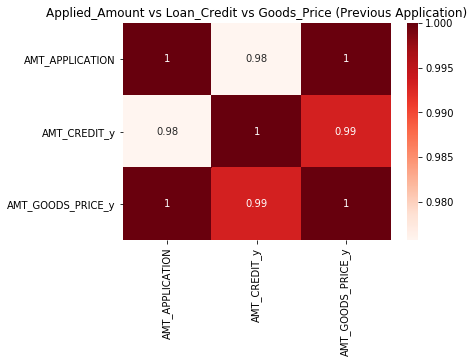

In [132]:
# Numeric-Numeric high co-relation between Applied Amount vs Loan_Credit vs GOODS PRICE

plt.title("Applied_Amount vs Loan_Credit vs Goods_Price (Previous Application)")
sns.heatmap(df3[['AMT_APPLICATION','AMT_CREDIT_y','AMT_GOODS_PRICE_y']].corr(),annot=True,cmap='Reds')
plt.show()
# AMT_APPLICATION	AMT_CREDIT_y

# plt.subplot(1,2,2)
# plt.title("Non-Churn")
# plt.scatter(df_0['TotalCharges'], df_0['tenure'])

#### High correlation between Applied_Amount, Loan_Credit and Goods_Price .
#### As goods price is inter-related to applied amount and loan credit is issued for applied amount.

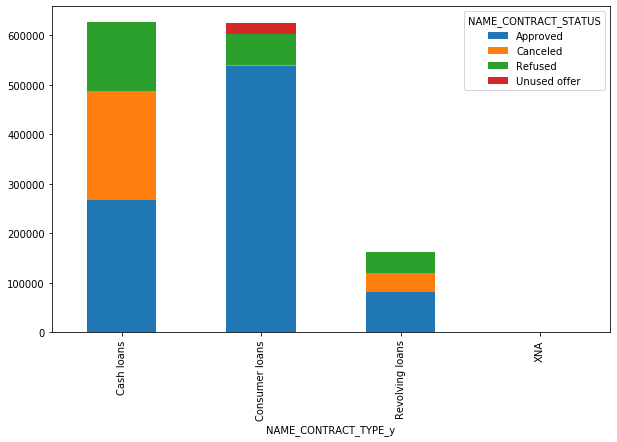

In [53]:
# Catagorical-Catagorical
d5=pd.pivot_table(data=df3,
    index=['NAME_CONTRACT_TYPE_y'],
    columns=['NAME_CONTRACT_STATUS'] ,          
    values='SK_ID_PREV',
    aggfunc='count'
)
d5.plot(kind="bar",stacked=True, figsize=[10,6])

#### There are higher amount of cancellations and rejection in cash loans
#### A few cancellations and rejection in other 2 categories
#### High approval rates for consumer loans.

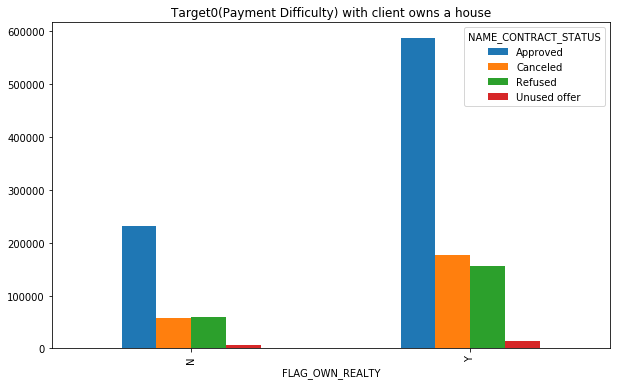

In [171]:
# Catagorical-Catagorical
d=pd.pivot_table(data=df3[(df3['TARGET']==0)],
    index=['FLAG_OWN_REALTY'],
    columns=['NAME_CONTRACT_STATUS'] ,          
    values='SK_ID_PREV',
    aggfunc='count'
)
d.plot(kind="bar", figsize=[10,6],title="Target0(Payment Difficulty) with client owns a house")

#### Applicants owning home has much approval rate, but have difficulty in repaying the loan

## Conclusion
### Application Dataset
#### There is only 8% of applicants with payment difficulties.
#### Ages below 40 difficulty in loan repayment
#### Married people applied for a loan to purchase high valued goods
#### Loan credit is given based on the income of an applicant

### Merged Dataset
#### Applications for huge sums of loan are not approved in most cases.
#### Requested amount to purchase goods is provided via loan credit in both the cases.
#### Applicants with medium salary has more repaying capabilities in both the datasets.
#### Most of the loan applications are approved
#### cash loans have low approval rates and consumer loans have high approvals.
#### Even though applicants with home has a high approval rate, they have difficulty in loan repayment

## Recommendations inorder to avoid repayment risks
#### Loan repayment capability checks has to be considered for ages below 40 
#### More checks has to be performs while lending loans to applicants with medium income
#### Better to avoid lending loans to applicants who own a house with payment difficutiles 